In [6]:
from datetime import datetime
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

## データの読み込み

In [2]:
connection = psycopg2.connect(host="localhost", database="github", user="yudai",password="yudaiap0913")

In [3]:
query = "SELECT * FROM EventTable;"

event = pd.read_sql(query, connection)
event.head()

,event_id,username,event_type,repository_name,commits,additions,deletions,changed_files,event_number,created_at
0,13609911999,Snailclimb,IssuesEvent,Snailclimb/awesome-java,0,0,0,0,9,2020-09-23 06:24:21
1,13561876234,Snailclimb,IssuesEvent,Snailclimb/awesome-java,0,0,0,0,11,2020-09-18 05:41:53
2,13548014495,Snailclimb,PullRequestEvent,Snailclimb/JavaGuide,1,1,1,1,934,2020-09-17 05:39:27
3,13547945496,Snailclimb,PullRequestEvent,Snailclimb/JavaGuide,1,1,1,1,933,2020-09-17 05:29:47
4,13546124027,Snailclimb,PullRequestEvent,Snailclimb/guide-rpc-framework,2,92,23,5,14,2020-09-17 00:24:03


In [5]:
query = "SELECT * FROM RepoTable;"

repo = pd.read_sql(query, connection)
repo.head()

,repository_name,username,star,fork,language,repo_size,created_at,structure_file
0,awesome-java,Snailclimb,3456,742,None,1677,2019-12-06 11:03:23,None
1,JavaGuide,Snailclimb,88583,30659,Java,47923,2018-05-07 13:27:00,None
2,guide-rpc-framework,Snailclimb,710,284,Java,4287,2020-05-10 13:24:42,None
3,eladmin,elunez,10671,3941,Java,7322,2018-12-14 08:54:24,None
4,reactor-core,reactor,3211,721,Java,58209,2015-11-10 10:06:40,None


## Star, Fork 数の確認

In [28]:
star_norm = []
fork_norm = []

for i in range(len(repo)):
    star_norm.append(repo.star[i] / ((datetime.now() - repo.created_at[i]).days + 1))
    fork_norm.append(repo.fork[i] / ((datetime.now() - repo.created_at[i]).days + 1))
    
repo["star_norm"] = star_norm
repo["fork_norm"] = fork_norm

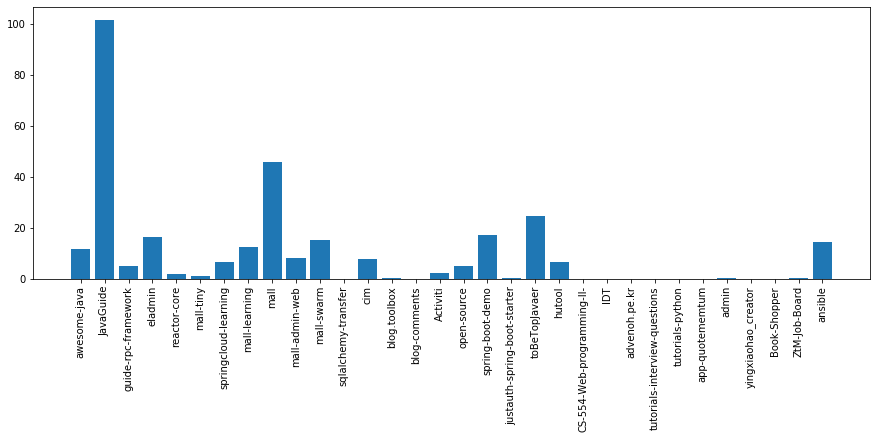

In [31]:
plt.figure(figsize=(15, 5))
plt.bar(repo.repository_name, repo.star_norm)
plt.xticks(rotation=90)
plt.show()

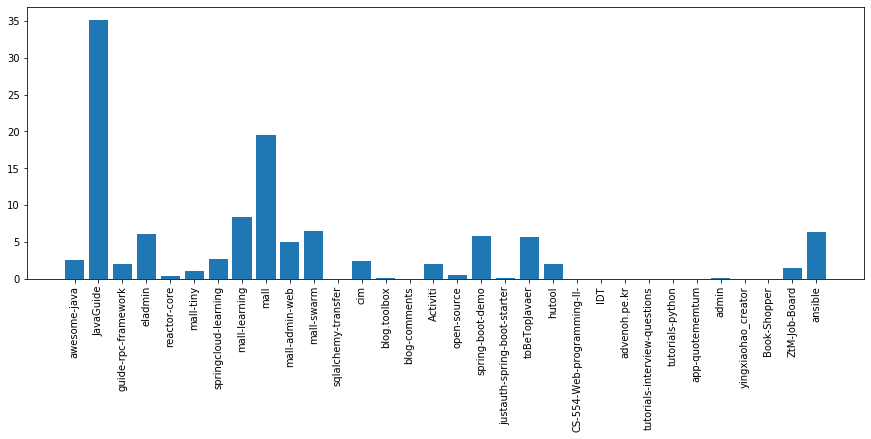

In [32]:
plt.figure(figsize=(15, 5))
plt.bar(repo.repository_name, repo.fork_norm)
plt.xticks(rotation=90)
plt.show()

## Event の数と Star, Fork の相関関係

In [41]:
import requests
from requests.auth import HTTPBasicAuth
import os
import dotenv

dotenv.load_dotenv()

def get_commits(user, repo, num):
    auth = HTTPBasicAuth(
        os.environ.get("GITHUB_USERNAME"), os.environ.get("GITHUB_TOKEN")
    )
    data = requests.get(f"https://api.github.com/repos/{user}/{repo}/pulls/{num}/commits/", auth=auth)
    data = data.json()

    return data

In [42]:
get_commits("Snailclimb", "JavaGuide", 934)

{'message': 'Not Found', 'documentation_url': 'https://docs.github.com/rest'}